In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
%matplotlib inline

In [23]:
data = pd.read_csv(r"C:\Users\RUCHITA ANGRE\Desktop\Project msc cs 2\project data.csv")

In [24]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Did you find good quality of product online as compare to your Retailer Shop?,Do you find enough Quantity of grocery product online in comparison to your Retailer ?,Are online products cheaper in price as compared to your Retailer Shop?,"Did you find product online easily ,compare to your Retailer Shop?",Do you find any difficulties in online payment ?,Are you satisfied with the product you received as compared to your Retailer Shop?,"On scale of 5 , can you rate for following factor ? [On Time Delivery]","On scale of 5 , can you rate for following factor ? [Trustworthy]","On scale of 5 , can you rate for following factor ? [No transaction issues]","On scale of 5 , can you rate for following factor ? [Security]","On scale of 5 , can you rate for following factor ? [Product Description]","On scale of 5 , can you rate for following factor ? [Product Reviews]",Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would you prefer shopping grocery online than shopping from your Retailer Shop?,"Overall, How would you rate your Online Grocery Shopping Experience"
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,Yes,Yes,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,No,Yes,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,No,No,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,No,No,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


In [25]:
data.rename(columns = {'Did you find good quality of product online as compare to your Retailer Shop?':'Quality','Do you find enough  Quantity of grocery product  online in comparison to your Retailer ? ':'Quantity','Are online  products cheaper in price as compared to your Retailer Shop? ':'Cheaper in price', 'Did you find product online easily ,compare to  your Retailer Shop? ':'Found Product Online Easily','Do you find any difficulties in online payment ?':'Difficulties in Online Payments','Are you satisfied with the product  you received as compared to your  Retailer Shop? ':'Satisfaction',
                      'On scale of 5 , can you rate for following factor ? [On Time Delivery]':'On Time Delivery',
                        'On scale of 5 , can you rate for following factor ? [Trustworthy]':'Trustworthy',
       'On scale of 5 , can you rate for following factor ? [No transaction issues]':'No transaction issues',
       'On scale of 5 , can you rate for following factor ? [Security]':'Security',
       'On scale of 5 , can you rate for following factor ? [Product  Description]':'Product  Description',
       'On scale of 5 , can you rate for following factor ? [Product Reviews]':'Product Reviews', 'Overall, How would you rate your Online Grocery Shopping Experience':'Overall Experience','Would you prefer  shopping grocery online  than shopping  from your Retailer Shop?  ':'Would You Prefer'}, inplace = True)


In [26]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,Yes,Yes,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,No,Yes,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,No,No,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,No,No,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


In [27]:
def trans_con(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0

In [28]:
data[ 'Would You Prefer'] = data[ 'Would You Prefer'].apply(trans_con)

In [29]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,1,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,Yes,Yes,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,1,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,1,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,1,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,No,Yes,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,No,No,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,0,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,1,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,1,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,No,No,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,0,1


In [30]:
data['Quality'] = data['Quality'].apply(trans_con)
data['Quantity'] = data['Quantity'].apply(trans_con)

In [31]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,1,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,1,1,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,1,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,1,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,1,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,0,1,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,0,0,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,0,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,1,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,1,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,0,0,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,0,1


In [32]:
x = data[['Quality', 'Quantity', 'Trustworthy']]

In [33]:
y =data[[ 'Why do you  Shop Online?  ']]

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size =0.25)

In [35]:
len(X_train)

277

In [36]:
len(X_test)

93

In [37]:
X_train

,Quality,Quantity,Trustworthy
236,0,0,1
111,0,1,1
189,0,0,4
198,1,1,4
204,0,0,1
...,...,...,...
35,1,1,1
272,1,0,3
28,1,0,3
165,1,1,1


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier( n_estimators = 20)
model.fit(X_train,Y_train)

<ipython-input-39-0cadcf626bcf>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=20)

In [40]:
y_pred = model.predict(X_test)

In [41]:
y_pred

array(['All of above', 'All of above',
       'Variety of Product;Discount & Offers;Shop at any time',
       'Discount & Offers;Shop at any time', 'All of above',
       'Discount & Offers;Shop at any time', 'All of above',
       'All of above', 'All of above', 'All of above', 'All of above',
       'All of above', 'All of above',
       'Discount & Offers;Shop at any time', 'All of above',
       'Discount & Offers', 'All of above', 'Shop at any time',
       'All of above', 'All of above', 'All of above', 'All of above',
       'All of above', 'All of above', 'All of above', 'All of above',
       'All of above', 'All of above', 'All of above', 'All of above',
       'All of above', 'All of above', 'All of above', 'All of above',
       'All of above', 'All of above', 'All of above', 'Shop at any time',
       'All of above', 'All of above', 'All of above', 'All of above',
       'All of above', 'All of above',
       'Discount & Offers;Shop at any time',
       'Discount & Offers;

In [42]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test, y_pred))

[[43  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  2  0  0  3  1  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]]
                                                                      precision    recall  f1-score   support

                                                        All of above    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
one_hot_data = pd.get_dummies(data[['Why do you  Shop Online?  ', 'Would You Prefer',]])

In [44]:
one_hot_data

,Would You Prefer,Why do you Shop Online? _All of above,Why do you Shop Online? _Convenient,Why do you Shop Online? _Convenient;Shop at any time,Why do you Shop Online? _Discount & Offers,Why do you Shop Online? _Discount & Offers;Convenient,Why do you Shop Online? _Discount & Offers;Convenient;Shop at any time,Why do you Shop Online? _Discount & Offers;No Hidden Cost;Shop at any time,Why do you Shop Online? _Discount & Offers;Shop at any time,Why do you Shop Online? _No Hidden Cost;Shop at any time,...,Why do you Shop Online? _Variety of Product,Why do you Shop Online? _Variety of Product;Convenient,Why do you Shop Online? _Variety of Product;Convenient;Shop at any time,Why do you Shop Online? _Variety of Product;Discount & Offers,Why do you Shop Online? _Variety of Product;Discount & Offers;Convenient,Why do you Shop Online? _Variety of Product;Discount & Offers;Convenient;Shop at any time,Why do you Shop Online? _Variety of Product;Discount & Offers;No Hidden Cost;Shop at any time,Why do you Shop Online? _Variety of Product;Discount & Offers;Shop at any time,Why do you Shop Online? _Variety of Product;No Hidden Cost,Why do you Shop Online? _Variety of Product;Shop at any time
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
train, test = train_test_split(one_hot_data, test_size =0.25)

In [46]:
train.shape

(277, 21)

In [47]:
test.shape

(93, 21)

In [61]:
c1 = DecisionTreeClassifier(min_samples_split=30)
c2 = DecisionTreeClassifier(min_samples_split=10)

In [62]:
features = ['Why do you  Shop Online?  _All of above' ,'Why do you  Shop Online?  _Variety of Product', 'Why do you  Shop Online?  _Convenient','Why do you  Shop Online?  _Discount & Offers']

In [63]:
X_train = train[features]
y_train = train['Would You Prefer']

X_test = test[features]
y_test = test['Would You Prefer']

In [64]:
tree1 = c1.fit(X_train, y_train)
tree2 = c2.fit(X_train, y_train)

In [65]:
y_pred_t1 = c1.predict(X_train)
y_pred_t2 = c2.predict(X_train)

In [66]:
y_pred1 = c1.predict(X_test)
y_pred2 = c2.predict(X_test)

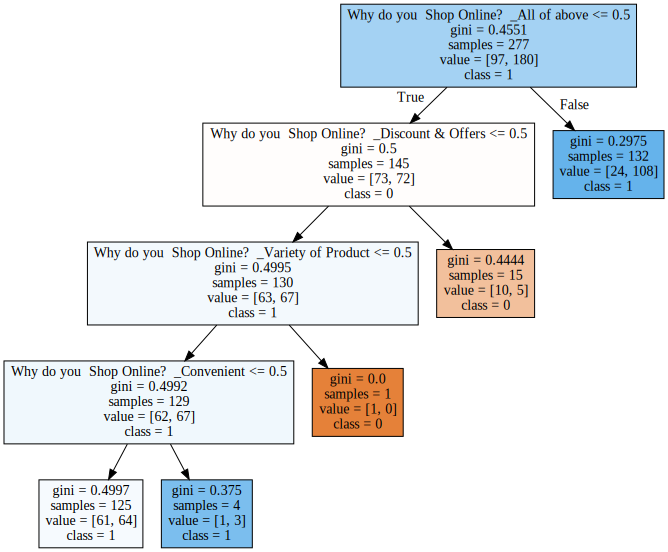

In [67]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [68]:
train_score_1 = accuracy_score(y_train, y_pred_t1)*100
train_score_1

67.14801444043322

In [69]:
train_score_2 = accuracy_score(y_train, y_pred_t2)*100
train_score_2

67.14801444043322

In [70]:
test_score_1 = accuracy_score(y_test, y_pred1)*100
test_score_1

67.74193548387096

In [71]:
test_score_2 = accuracy_score(y_test, y_pred2)*100
test_score_2

67.74193548387096

In [72]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.18      0.29        33
           1       0.68      0.95      0.79        60

    accuracy                           0.68        93
   macro avg       0.67      0.57      0.54        93
weighted avg       0.67      0.68      0.61        93



In [73]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.18      0.29        33
           1       0.68      0.95      0.79        60

    accuracy                           0.68        93
   macro avg       0.67      0.57      0.54        93
weighted avg       0.67      0.68      0.61        93

